# Basic Preprocessing Pipelines

When we have a number of preprocessing steps that we'd like to accomplish in a row prior to running an algorithm or fitting a model we use what are known as pipelines.

## What We'll Accomplish in This Notebook

- We'll introduce the concept of a pipeline
- Show you how to build basic pipelines for polynomial and other nonlinear transforms
- Demonstrate useful `sklearn` features for data preprocessing

In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Polynomial Features

Let's create a data set where we know for a fact that we'd like to perform polynomial regression.

In [2]:
np.random.seed(440)

x = 10*np.random.random(1000) - 5

y = 1 + x - 2*x**2 + .5*x**3 + 10*np.random.randn(1000)

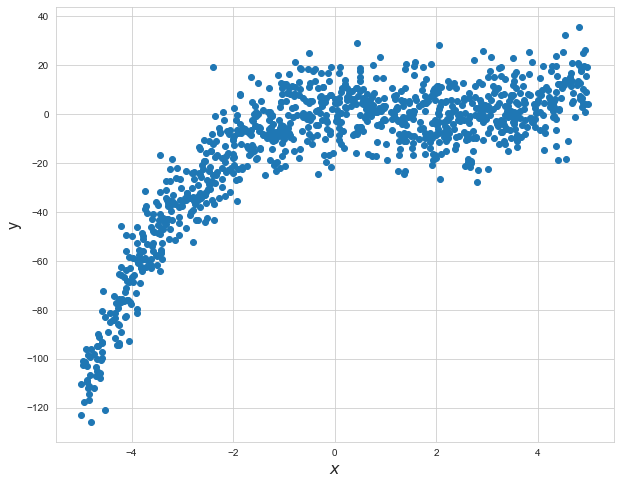

In [3]:
plt.figure(figsize=(10,8))

plt.scatter(x,y)

plt.xlabel("$x$", fontsize=16)
plt.ylabel("y", fontsize=16)

plt.show()

We could create $x^2$ and $x^3$ features by hand, but a quicker and more easily reproducable way is to use the `PolynomialFeatures` `Transformer` object from `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html</a>.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
## This creates a polynomial features object
## with degree 3
## and no bias column
poly = PolynomialFeatures(degree=3, include_bias = False)

## What is fit_transform? For now don't worry about it
## We'll discuss it in greater depth later in the notebook
print("\t[x,\t \t x^2, \t \t x^3]")
poly.fit_transform(x.reshape(-1,1))

	[x,	 	 x^2, 	 	 x^3]


array([[ -3.28141364,  10.7676755 , -35.33319727],
       [  4.65145829,  21.63606418, 100.63925   ],
       [  3.47339514,  12.06447381,  41.90468474],
       ...,
       [  1.29472287,   1.67630732,   2.17035342],
       [ -3.56107602,  12.68126239, -45.15893933],
       [ -2.55465258,   6.5262498 , -16.67230089]])

In [12]:
## For our own edification let's see what happens when
## include_bias = True
poly = PolynomialFeatures(degree=3, include_bias = True)

print("\t[x,\t \t x^2, \t \t x^3]")
poly.fit_transform(x.reshape(-1,1))

	[x,	 	 x^2, 	 	 x^3]


array([[  1.        ,  -3.28141364,  10.7676755 , -35.33319727],
       [  1.        ,   4.65145829,  21.63606418, 100.63925   ],
       [  1.        ,   3.47339514,  12.06447381,  41.90468474],
       ...,
       [  1.        ,   1.29472287,   1.67630732,   2.17035342],
       [  1.        ,  -3.56107602,  12.68126239, -45.15893933],
       [  1.        ,  -2.55465258,   6.5262498 , -16.67230089]])

In [14]:
## Let's return to the correct polynomial transformer now
poly = PolynomialFeatures(degree=3, include_bias = False)

## Why just fit? Again let's be patient
## we'll have the answer soon!
poly.fit(x.reshape(-1,1))

PolynomialFeatures(degree=3, include_bias=False)

We can now use this correctly transformed data (no bias column) to fit a linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Now we can use this to fit a linear regression model
slr = LinearRegression(copy_X = True)

slr.fit(poly.transform(x.reshape(-1,1)),y)

LinearRegression()

In [17]:
# y = 1 + x - 2*x**2 + .5*x**3 + 10*np.random.randn(1000)
print(slr.intercept_,slr.coef_)

1.2389120109170655 [ 1.29584445 -2.06063619  0.47151387]


### You Code

Create the data below. Then try using `PolynomialFeatures` with the argument `interaction_only = True` to fit a regression model. Still use `include_bias=False`.

In [21]:
## Here is the data you'll need to transform
## Note everyone's final output will be slightly different
## because there was no random seed
x = np.random.randn(1000,2)

## Here is the output you'll want to model
y = x[:,0] + x[:,1] + 3*x[:,0]*x[:,1] + .5*np.random.randn(1000)

In [22]:
## Make the polynomial transformer here

## Sample Answer
poly = PolynomialFeatures(degree = 2,interaction_only=True,include_bias=False)

## Print the results of fit_transform here

## Sample Answer
print("[\t x1, \t x2, \t x1*x2]")
print(poly.fit_transform(x))


[	 x1, 	 x2, 	 x1*x2]
[[-1.1590789  -1.04211594  1.2078946 ]
 [ 0.96637159 -0.30393365 -0.29371284]
 [-0.47076918 -0.69504421  0.32720539]
 ...
 [ 0.72884318  1.35133832  0.98491371]
 [-0.91172587  0.40538086 -0.36959622]
 [-0.1305015  -1.14811512  0.14983075]]


In [23]:
## fit the regression model here
## print out the regression intercept and coefficients and
## compare them to the actual relationship used to generate y

## Sample Answer
reg = LinearRegression(copy_X=True)
reg.fit(poly.transform(x),y)

print(reg.intercept_,reg.coef_)


-0.013256183193182891 [0.97665942 0.99980633 3.00063782]


## Function Transformer

`PolynomialFeatures` is great if we want the polynomial powers of all the features of the input array. However, as we've seen this is not always desirable. This is where `FunctionTransformer` comes into play. `FunctionTransformer` applies custom written functions to your data much like `PolynomialFeatures` applies the polynomial transformations. Let's use the `Advertising` data we looked at in `Regression` as an example.

In [25]:
## Load the data
ads = pd.read_csv("Advertising.csv")
ads_copy = ads.copy()

ads_train = ads_copy.sample(frac = .75, random_state = 614)

In [26]:
## Get the columns we want
X_train = np.array(ads_train[['TV','radio']])
y_train = np.array(ads_train['sales'])

In [27]:
## a function that returns an array with the squareroot of the 
## TV column
## and the sqrt_TV radio interaction
def get_feats(X):
    processed_X = np.empty((np.shape(X)[0], 4))
    
    # get TV
    processed_X[:,0] = X[:,0]
    
    # get sqrtTV
    processed_X[:,1] = np.sqrt(X[:,0])
    
    # get radio
    processed_X[:,2] = X[:,1]
    
    # get interaction
    processed_X[:,3] = processed_X[:,1]*processed_X[:,2]
    
    return processed_X

In [29]:
## FunctionTransformer is also stored in sklearn.preprocessing
from sklearn.preprocessing import FunctionTransformer

In [30]:
## Create A FunctionTransformer with the get_feats function
## we defined above
function = FunctionTransformer(get_feats)

In [32]:
## We can transform our data with .transform
## We'll demonstrate with the first 10 rows of the data
print("[\t TV, \t sqrt_TV, \t radio, \t sqrtTV_radio]")

## Look no fit here, I wonder why?
function.transform(X_train[1:10,:])

[	 TV, 	 sqrt_TV, 	 radio, 	 sqrtTV_radio]


array([[220.5       ,  14.8492424 ,  33.2       , 492.99484784],
       [  5.4       ,   2.32379001,  29.9       ,  69.48132123],
       [ 74.7       ,   8.64291617,  49.4       , 426.96005902],
       [171.3       ,  13.08816259,  39.7       , 519.60005485],
       [218.5       ,  14.7817455 ,   5.4       ,  79.8214257 ],
       [ 93.9       ,   9.69020124,  43.5       , 421.52375378],
       [240.1       ,  15.49516053,   7.3       , 113.1146719 ],
       [112.9       ,  10.62544117,  17.4       , 184.88267631],
       [214.7       ,  14.65264481,  24.        , 351.6634755 ]])

## Pipelines

Up to this point the only data preprocessing we've done is different types of transformations.

However, in the future we'll encounter data that requires more work. `sklearn` offers a nice way to package everything you'd like to do to your data with one line of code.

We can think of the data process like a pipeline, we input the data at one end and output the prediction on the other. Along the way it may need to be cleaned, scaled, or transformed, and then finally used to fit a model and the prediction is spit out on the other side. The `sklearn` `Pipeline` object allows us to get a "pipe" ready for our data to flow through.

Let's again look at the `Advertising` data.

In [34]:
## Pipeline is stored in pipeline
from sklearn.pipeline import Pipeline

In [35]:
## Call Pipeline
## The steps are put in the order you want them executed
## They are stored in a list of arrays
## First we want to apply our get_feats function, we'll call this 'preprocess'
## Then we want to fit a regression model, we'll call this 'reg'
pipe = Pipeline([('preprocess',FunctionTransformer(get_feats)),
                ('reg',LinearRegression(copy_X = True))])

In [36]:
## Now we call the pipeline just like a regression object
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function get_feats at 0x7fabb97ffe60>)),
                ('reg', LinearRegression())])

In [37]:
## We can access the regression coefficients like so
## each part of the pipe is stored like a dictionary
print(pipe['reg'].coef_)

[-0.00430049  0.5148685  -0.05623614  0.02200766]


In [38]:
## We can make a prediction using .predict
## just like with a normal regression object
pipe.predict(X_train[:10])

array([19.73886346, 19.91057896,  5.25168964, 14.97785154, 19.435422  ,
       12.35481128, 15.64664909, 13.25509352, 12.30631161, 17.2412992 ])

`Pipeline`s are quite useful, especially when we have additional preprocessing steps. They also make the process of measuring testing error much quicker to implement because we don't have to make transformed data versions of the test data by hand like before. That's what the `Pipeline` is for!

### You Code

You'll now make a pipeline to preprocess the data set from the interview problem we looked at in Notebook 3.

In [40]:
df = pd.read_csv("PredictiveModelingAssessmentData.csv")

df_train = df.copy().sample(frac=.75,random_state = 440)

In [41]:
from pandas.plotting import scatter_matrix

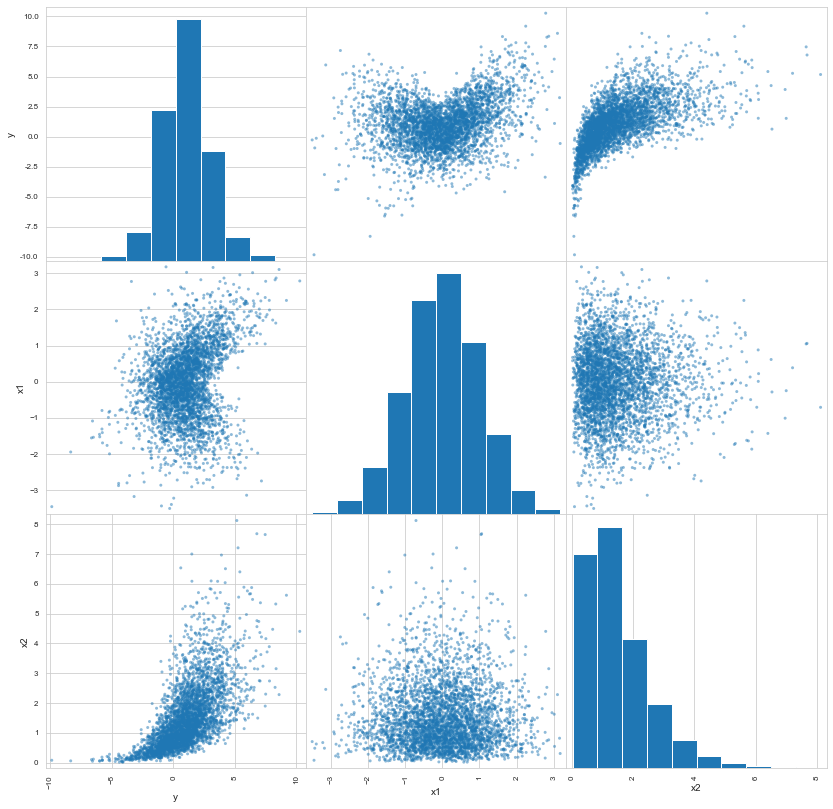

In [42]:
scatter_matrix(df_train, figsize=(14,14))

plt.show()

Make a pipeline that takes in an array containing columns for $x_1$ and $x_2$ and fits the following regression model:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 \log(x_2)
$$

In [42]:
## Turn the training data into an input array, X_train
## and an output array, y_train

## Sample Answer

X_train = np.array(df_train[['x1','x2']])
y_train = np.array(df_train['y'])

In [43]:
## Make a custom function to preprocess the input data
## for the desired model

## Sample Answer
poly = PolynomialFeatures(degree = 2,include_bias=False)

def get_feats(X):
    preprocessed_X = np.empty((X.shape[0],3))
    
    preprocessed_X[:,:2] = poly.fit_transform(X[:,0].reshape(-1,1))
    
    preprocessed_X[:,2] = np.log(X[:,1])
    
    return preprocessed_X

In [44]:
## Make the pipeline here

## Sample Answer
pipe = Pipeline([('preprocess',FunctionTransformer(get_feats)),
                ('reg',LinearRegression(copy_X=True))])


In [43]:
## Fit the pipeline here, then look at the 
## regression coefficients

## Sample Answer
pipe.fit(X_train,y_train)

pipe['reg'].coef_

array([-0.00430049,  0.5148685 , -0.05623614,  0.02200766])

### `fit` vs. `fit_transform` vs. `transform`

As I've alluded to in the code snippets there are subtle differences between `fit`, `fit_transform` and `transform`. I'm sure that some of you have wondered about those differences, and when to use each one. These are all standard <i>methods</i> of `sklearn` `Transformer` objects.

#### `fit`

Some `Transformer`s can't transform your data without first knowing something about the data. For example with the `PolynomialFeatures` `Transformer` it needs to know the number of columns in your data set before it can decide what powers of columns to return. The `fit` method sends your input data through the `Transformer` and fits whatever needs to be fit in order for the `Transformer` can transform the data.

#### `transform`

This built-in method takes your input data and actually transforms it. <i>Note that this can only be called after the Transformer has been fit</i>. In our `PolynomialFeatures` example this means taking in the columns and squaring, cubing, and raising them to whatever power was specified.

#### `fit_transform`

This built-in method performs both of the prior steps at once.

## That's It!

That's it for this notebook. We'll return to pipelines at a later time so we can learn more advanced pipelines.

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)